<a href="https://colab.research.google.com/github/yoosukyeong/Analyze_data_with_Python/blob/main/Linear_Regression%EC%9C%BC%EB%A1%9C_%EB%B3%B4%ED%97%98%EB%A3%8C_%EC%98%88%EC%B8%A1%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('insurance.csv')

In [ ]:
data

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [ ]:
data.head()

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
data.tail()

,age,gender,bmi,children,smoker,charges
1333,50,1,30.97,3,0,10600.5483
1334,18,0,31.92,0,0,2205.9808
1335,18,0,36.85,0,0,1629.8335
1336,21,0,25.80,0,0,2007.9450
1337,61,0,29.07,0,1,29141.3603


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(4)
memory usage: 62.8 KB


In [ ]:
data.describe()

,age,gender,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


In [ ]:
data[['age', 'gender', 'children', 'smoker']]

,age,gender,children,smoker
0,19,0,0,1
1,18,1,1,0
2,28,1,3,0
3,33,1,0,0
4,32,1,0,0
...,...,...,...,...
1333,50,1,3,0
1334,18,0,0,0
1335,18,0,0,0
1336,21,0,0,0


In [ ]:
data.head()

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
X_train.head(3)

,age,gender,bmi,children,smoker
1306,29,0,21.850,0,1
124,47,0,33.915,3,0
588,61,0,35.910,0,0


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
pred = lr.predict(X_test)

In [ ]:
result = pd.DataFrame({'actual' : y_test, 'pred' : pred})

In [ ]:
result

,actual,pred
12,1826.84300,4765.249466
306,20177.67113,4957.730865
318,7421.19455,8298.988153
815,1877.92940,3078.811868
157,15518.18025,24165.956542
...,...,...
713,1984.45330,5776.764928
1282,14283.45940,23102.847340
531,14043.47670,14280.732585
537,8825.08600,10527.417291


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='actual', ylabel='pred'>

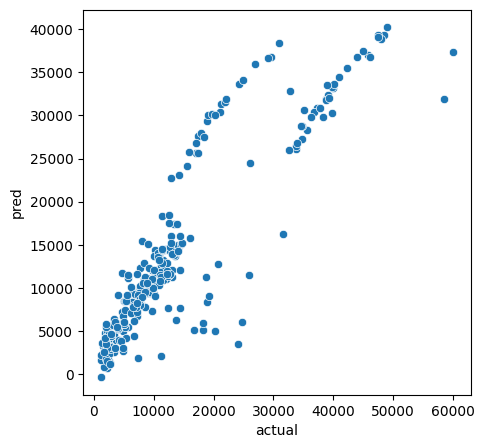

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= 'actual', y= 'pred', data=result)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, pred, squared = False)

5684.927776334485

In [ ]:
lr.score(X_train, y_train)

0.7368220127747351

In [ ]:
data.head()

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
X_train.columns

Index(['age', 'gender', 'bmi', 'children', 'smoker'], dtype='object')

In [ ]:
# 기울기 값
lr.coef_

array([2.64799803e+02, 1.73446608e+01, 2.97514806e+02, 4.69339602e+02,
       2.34692802e+04])

In [ ]:
pd.Series(lr.coef_, index = X_train.columns)

age           264.799803
gender         17.344661
bmi           297.514806
children      469.339602
smoker      23469.280173
dtype: float64

In [ ]:
lr.intercept_

-11576.999976112367

In [ ]:
# predicted_charges = 264.799803 * age + 17.344661 * gender + 297.514806 * bmi + 469.339602 * children + 23469.280173 * smoker - 11576.999976112367

In [ ]:
pred

array([ 4765.24946593,  4957.73086482,  8298.98815254,  3078.81186784,
       24165.95654247, 36827.72848649, 14683.34729348,  2599.3384217 ,
       29378.62194348, 16011.75090087, 15493.17858732,  5101.23688482,
       11011.10641383,  4161.31766196,  9810.62254709, 31856.8853975 ,
       12016.55190749, 13235.61067675,  7251.8789603 , 18394.80961708,
       14393.20060321,  3253.85100146,  6715.71478454, 31290.24757633,
       13776.33709853, 31904.24021054,  6397.17630407, 39339.48397832,
       31565.9666249 , 13742.23078678, 18448.10494977,  2282.95976263,
       38922.93999878, 26116.16609375,  8866.70869349, 12036.24255782,
        8406.17827743, 32351.5635203 ,  3959.06572303, 38354.72996424,
        8219.4129384 , 12308.73069101,  5604.28772112,  8468.4404493 ,
         651.06780185,  5503.69704365,  5673.30373447,  3843.67247433,
        2098.72488739, 11186.31121281, 17460.67125615,  7916.72813038,
        5042.69712676,  8273.18990771,  7541.05592985, 14372.15862948,
      

In [ ]:
X_test

,age,gender,bmi,children,smoker
12,23,1,34.400,0,0
306,28,0,27.500,2,0
318,44,0,27.645,0,0
815,20,0,31.460,0,0
157,18,1,25.175,0,1
...,...,...,...,...,...
713,20,1,40.470,0,0
1282,18,0,21.660,0,1
531,62,0,31.730,0,0
537,46,0,30.200,2,0


In [ ]:
264.799803 * 23 + 17.344661 * 1 + 297.514806 * 34.400 + 469.339602 * 0 + 23469.280173 * 0 - 11576.999976112367

4765.249480287634

## Python: Pandas의 Indexing

In [ ]:
data['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [ ]:
data[['age', 'gender']]

,age,gender
0,19,0
1,18,1
2,28,1
3,33,1
4,32,1
...,...,...
1333,50,1
1334,18,0
1335,18,0
1336,21,0


In [ ]:
data.head()

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520


In [ ]:
data.loc[0:5]

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160


In [ ]:
data.iloc[:8]

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
5,31,0,25.740,0,0,3756.62160
6,46,0,33.440,1,0,8240.58960
7,37,0,27.740,3,0,7281.50560


In [ ]:
sample_df = pd.read_csv('sample_df.csv', index_col = 0)

In [ ]:
sample_df.head()

,var_1,var_2,var_3,var_4,var_5
a,2,2,1,4,3
b,4,3,3,7,1
c,5,4,6,3,5
d,1,4,5,6,7
e,4,5,7,8,3


In [ ]:
sample_df.loc['a':'d']

,var_1,var_2,var_3,var_4,var_5
a,2,2,1,4,3
b,4,3,3,7,1
c,5,4,6,3,5
d,1,4,5,6,7


In [ ]:
data.iloc[2:6, 1:4]

,gender,bmi,children
2,1,33.000,3
3,1,22.705,0
4,1,28.880,0
5,0,25.740,0


## 데이터 프레임과 시리즈

In [ ]:
data

,age,gender,bmi,children,smoker,charges
0,19,0,27.900,0,1,16884.92400
1,18,1,33.770,1,0,1725.55230
2,28,1,33.000,3,0,4449.46200
3,33,1,22.705,0,0,21984.47061
4,32,1,28.880,0,0,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830
1334,18,0,31.920,0,0,2205.98080
1335,18,0,36.850,0,0,1629.83350
1336,21,0,25.800,0,0,2007.94500


In [ ]:
# 데이터 시리즈
data['age']

0       19
1       18
2       28
3       33
4       32
        ..
1333    50
1334    18
1335    18
1336    21
1337    61
Name: age, Length: 1338, dtype: int64

In [ ]:
# 데이터 프레임
pd.DataFrame(data['age'])

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21
